# Step 1: Import Libraries and Load the Titanic Dataset

We begin by importing essential libraries for data processing, visualisation, and modelling. The Titanic dataset is loaded into a Pandas DataFrame for exploration.

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the dataset
# Set working directory (adjust path as needed)
os.chdir(r"C:\Users\Downloads")
train_data = pd.read_csv("train.csv")

In [3]:
# Display the first 10 rows
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Step 2: Data Exploration and Missing Value Check

We inspect the dataset to understand data types, numerical distributions, and missing values.

In [4]:
# Check dataset structure and data types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# View basic statistical summary
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Check for missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Step 3: Handling Missing Data

Missing Age values are replaced with the median.  
Missing Embarked entries are filled with 'C' based on fare and class patterns.  

In [7]:
# Fill missing Age values with the median
train_data['Age']=train_data['Age'].fillna(train_data['Age'].median())

In [8]:
# Check missing Embarked values
train_data[train_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [9]:
# Analyse similar records to fill missing Embarked values
train_data[(train_data['Pclass'] == 1) & (train_data['Fare'].between(75, 85))][['Embarked', 'Fare', 'Pclass']].value_counts()

Embarked  Fare     Pclass
C         79.2000  1         4
          76.7292  1         3
          83.1583  1         3
S         77.9583  1         3
          79.6500  1         3
C         78.2667  1         2
          82.1708  1         2
S         77.2875  1         2
          78.8500  1         2
          83.4750  1         2
C         75.2500  1         1
          76.2917  1         1
S         81.8583  1         1
Name: count, dtype: int64

In [10]:
# Fill missing Embarked with 'C'
train_data['Embarked']=train_data['Embarked'].fillna('C')

In [11]:
# Check for missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Step 4: Removing Unnecessary and Duplicate Data

Columns like Cabin, which contain too many missing values, are removed to simplify the dataset.  
Duplicate rows are also eliminated to maintain data quality.

In [12]:
# Drop the 'Cabin' column due to excessive missing values
train_data.drop('Cabin', axis=1, inplace=True)

In [13]:
# Remove duplicate rows, if any
train_data_dup = train_data.duplicated().any()
train_data_dup

False

In [14]:
# If duplicates exist, drop it
train_data = train_data.drop_duplicates()

In [15]:
# Verify no missing values remain
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
# Display the first 10 rows
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Step 5: Encoding Categorical Features

The Sex column is converted into numeric form for model compatibility.

In [17]:
# Convert 'Sex' column to numeric: female = 0, male = 1
train_data['Sex']=train_data['Sex'].map({'female':0, 'male': 1})

# Step 6: Feature Engineering – Extracting Passenger Titles

We extract passenger titles (e.g. Mr, Mrs, Miss) from the Name column to create a new feature that captures social status and gender indicators.

In [18]:
# Extract title from Name
train_data['Title']=train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [19]:
# Extract the unique titles
train_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [20]:
# Map rare titles into groups
title_mapping = {
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Master': 'Master',
    'Dr': 'Officer',
    'Rev': 'Officer',
    'Col': 'Officer',
    'Major': 'Officer',
    'Mlle': 'Miss',
    'Mme': 'Mrs',
    'Countess': 'Royalty',
    'Lady': 'Royalty',
    'Jonkheer': 'Royalty',
    'Don': 'Royalty',
    'Capt': 'Officer',
    'Sir': 'Royalty',
    'Ms': 'Miss'
}
train_data['Title'] = train_data['Title'].map(title_mapping)

In [21]:
# Fill the missing titles with 'Mr'
train_data['Title'] = train_data['Title'].fillna('Mr')

In [22]:
# Display the unique titles
train_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer'], dtype=object)

# Step 7: Final Cleaning and Encoding

Text features are dropped and the engineered Title feature is encoded into numeric form.

In [23]:
# Drop the irrelevant columns
train_data.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [24]:
# Check the data after the changes made
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,1,22.0,1,0,7.2500,S,Mr
1,2,1,1,0,38.0,1,0,71.2833,C,Mrs
2,3,1,3,0,26.0,0,0,7.9250,S,Miss
3,4,1,1,0,35.0,1,0,53.1000,S,Mrs
4,5,0,3,1,35.0,0,0,8.0500,S,Mr


In [25]:
# Encode titles numerically
le = LabelEncoder()
train_data['Title'] = le.fit_transform(train_data['Title'])

# Step 8: Exploratory Data Analysis

Visualising data helps uncover trends and patterns such as gender distribution, class imbalance, and survival relationships.

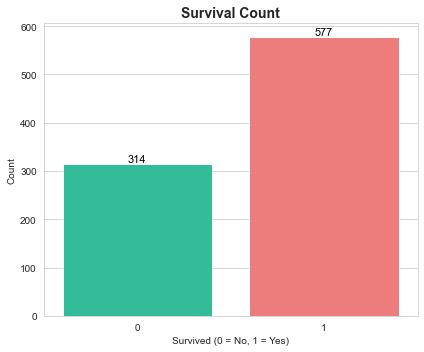

In [26]:
# Survival Count
sns.set_style("whitegrid")

plt.figure(figsize=(6, 5))
sns.countplot(data=train_data, x='Sex', hue='Sex', palette=['#1dd1a1', '#ff6b6b'], legend=False)
plt.title('Survival Count', fontsize=14, weight='bold')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Add count labels on bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=11, color='black')

plt.tight_layout()
plt.show()

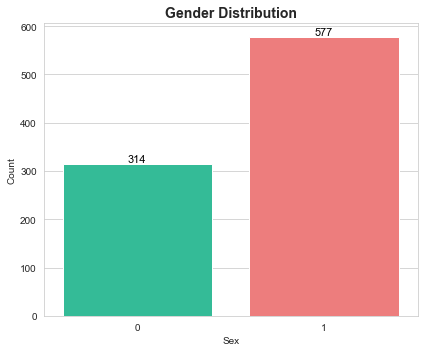

In [27]:
# Gender Distribution
sns.set_style("whitegrid")

plt.figure(figsize=(6, 5))
sns.countplot(data=train_data, x='Sex', hue='Sex', palette=['#1dd1a1', '#ff6b6b'], legend=False)

plt.title('Gender Distribution', fontsize=14, weight='bold')
plt.xlabel('Sex')
plt.ylabel('Count')

# Add count labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=11, color='black')

plt.tight_layout()
plt.show()

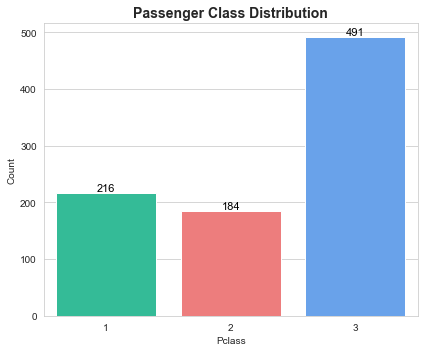

In [28]:
# Pclass Distribution
sns.set_style("whitegrid")

plt.figure(figsize=(6, 5))
sns.countplot(data=train_data, x='Pclass', hue='Pclass', palette=['#1dd1a1', '#ff6b6b', '#54a0ff'], legend=False)

plt.title('Passenger Class Distribution', fontsize=14, weight='bold')
plt.xlabel('Pclass')
plt.ylabel('Count')

# Add count labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=11, color='black')

plt.tight_layout()
plt.show()

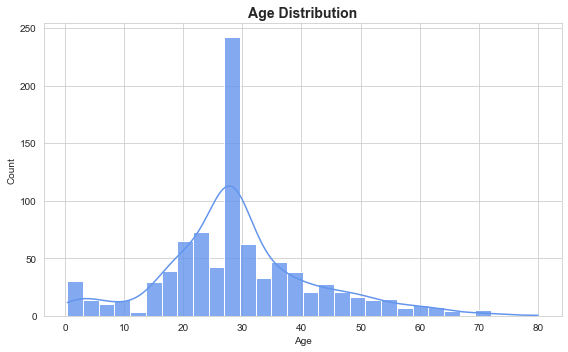

In [29]:
# Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=train_data, x='Age', bins=30, kde=True, color='cornflowerblue', edgecolor=None, alpha=0.8)
plt.title('Age Distribution', fontsize=14, weight='bold')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

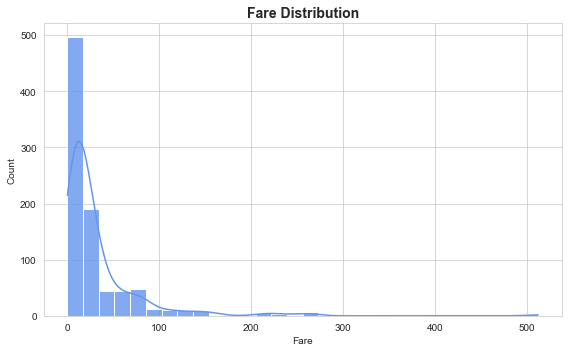

In [30]:
# Fare Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=train_data, x='Fare', bins=30, kde=True, color='cornflowerblue', edgecolor=None, alpha=0.8)
plt.title('Fare Distribution', fontsize=14, weight='bold')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

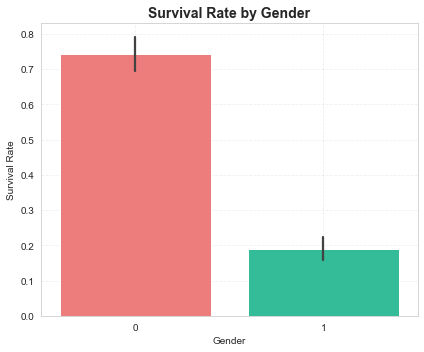

In [31]:
# Survival by Gender
plt.figure(figsize=(6, 5))
sns.barplot(data=train_data, x='Sex', y='Survived', hue='Sex', legend=False, palette=['#ff6b6b', '#1dd1a1'])
plt.title('Survival Rate by Gender', fontsize=14, weight='bold')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

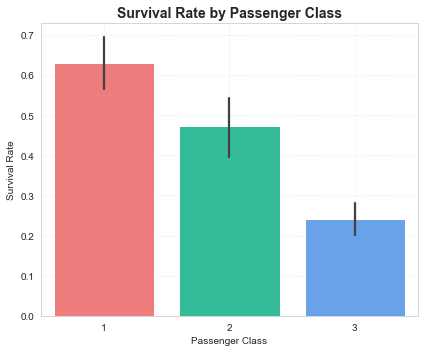

In [32]:
# Survival by Pclass
plt.figure(figsize=(6, 5))
sns.barplot(data=train_data, x='Pclass', y='Survived', hue='Pclass', legend=False, palette=['#ff6b6b', '#1dd1a1', '#54a0ff'])
plt.title('Survival Rate by Passenger Class', fontsize=14, weight='bold')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

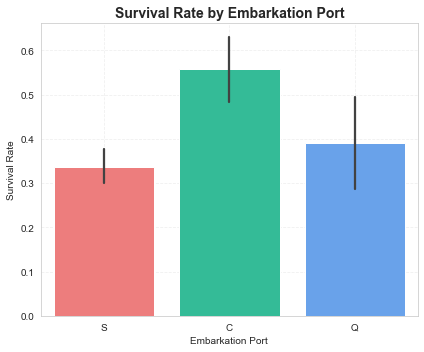

In [33]:
# Survival by Embarkation Port
plt.figure(figsize=(6, 5))
sns.barplot(data=train_data, x='Embarked', y='Survived', hue='Embarked', legend=False, palette=['#ff6b6b', '#1dd1a1', '#54a0ff'])
plt.title('Survival Rate by Embarkation Port', fontsize=14, weight='bold')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [34]:
# Convert 'Embarked' using one-hot encoding
train_data=pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)

In [35]:
# Change the data tyoe from Boolean to Integer
train_data[['Embarked_Q', 'Embarked_S']] = train_data[['Embarked_Q', 'Embarked_S']].astype(int)

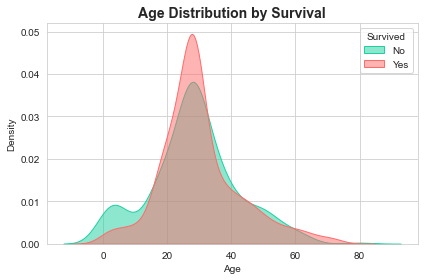

In [36]:
# Age vs Survival
sns.kdeplot(data=train_data, x='Age', hue='Survived', fill=True, common_norm=False, alpha=0.5, palette=['#ff6b6b', '#1dd1a1'])
plt.title('Age Distribution by Survival', fontsize=14, weight='bold')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

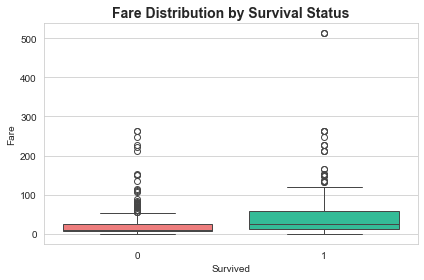

In [37]:
# Fare vs Survival
sns.boxplot(data=train_data, x='Survived', y='Fare', hue='Survived', legend=False, palette=['#ff6b6b', '#1dd1a1'])
plt.title('Fare Distribution by Survival Status', fontsize=14, weight='bold')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.tight_layout()
plt.show()

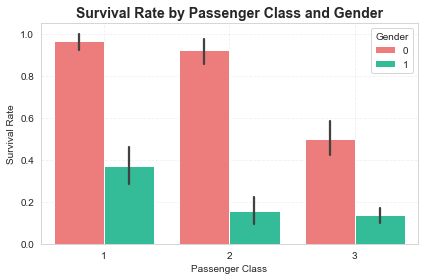

In [38]:
# Passenger, Class, Gender vs Survival
sns.barplot(data=train_data, x='Pclass', y='Survived', hue='Sex', palette=['#ff6b6b', '#1dd1a1'])
plt.title('Survival Rate by Passenger Class and Gender', fontsize=14, weight='bold')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Gender')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

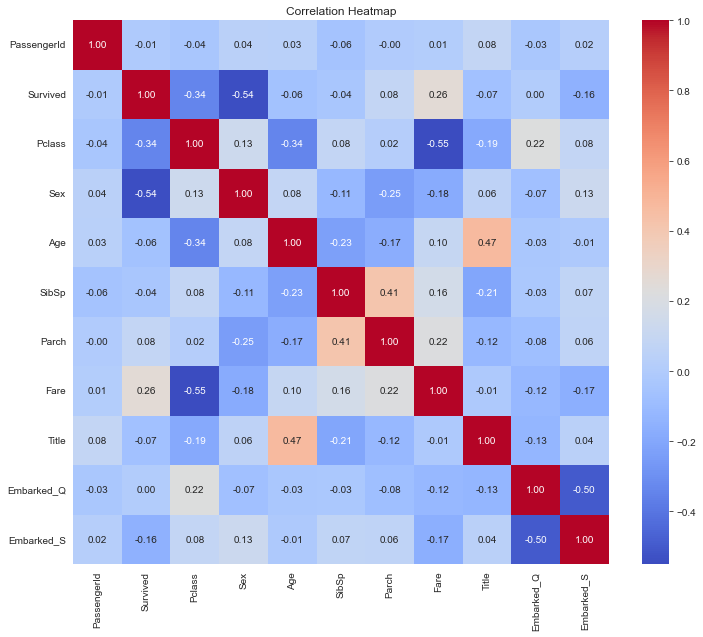

In [39]:
# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [40]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# Step 9: Family and Isolation Features

We create two new features:  
**FamilySize**: total family members on board.  
**IsAlone**: indicates if a passenger travelled alone.

In [41]:
# Create FamilySize and IsAlone features
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

train_data['IsAlone'] = 1 # default: alone
train_data.loc[train_data['FamilySize'] > 1, 'IsAlone'] = 0

In [42]:
# Drop redundant columns
train_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [43]:
# Display the first 5 rows of the dataset
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Title,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,1,0,3,1,22.0,7.2500,2,0,1,2,0
1,2,1,1,0,38.0,71.2833,3,0,0,2,0
2,3,1,3,0,26.0,7.9250,1,0,1,1,1
3,4,1,1,0,35.0,53.1000,3,0,1,2,0
4,5,0,3,1,35.0,8.0500,2,0,1,1,1


In [44]:
# Check the data type of all the columns
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Title        891 non-null    int32  
 7   Embarked_Q   891 non-null    int32  
 8   Embarked_S   891 non-null    int32  
 9   FamilySize   891 non-null    int64  
 10  IsAlone      891 non-null    int64  
dtypes: float64(2), int32(3), int64(6)
memory usage: 66.3 KB


# Step 10: Preparing Data for Machine Learning

Features are separated from the target, then scaled using StandardScaler to ensure uniformity across numeric features.

In [45]:
# Define features and target variable
X = train_data.drop(['Survived', 'PassengerId'], axis=1)
y = train_data['Survived']

In [46]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 11: Logistic Regression Model

**Logistic Regression** is used as the baseline classification model to predict survival. We evaluate performance using accuracy, classification report, and cross-validation.

In [48]:
# Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Predictions
logreg_y_pred = logreg.predict(X_test_scaled)

# Model evaluation
print("Accuracy: ", accuracy_score(y_test, logreg_y_pred))
print(confusion_matrix(y_test, logreg_y_pred))
print(classification_report(y_test, logreg_y_pred))

# Cross-validation
scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy: ", scores.mean())

Accuracy:  0.8044692737430168
[[90 15]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Cross-validation accuracy:  0.7980101688531793


D:\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x432 with 0 Axes>

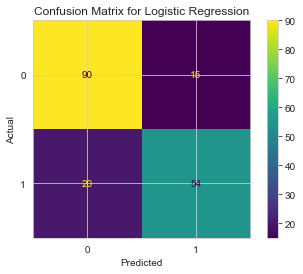

In [49]:
# Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
plot_confusion_matrix(logreg, X_test_scaled, y_test, values_format='d')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 12: K-Nearest Neighbours Model

The **KNN** algorithm is tested with various neighbour counts (k). The value giving the highest accuracy is selected as the optimal parameter.

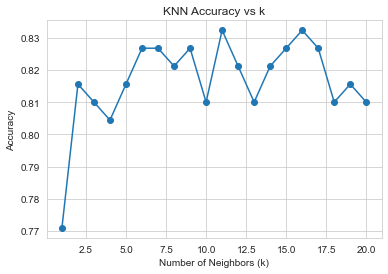

Best k value: 11, Accuracy: 0.8324


In [50]:
# Find best k value
accuracy_scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.plot(range(1, 21), accuracy_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs k')
plt.show()

# Best k
best_k = accuracy_scores.index(max(accuracy_scores)) + 1
print(f"Best k value: {best_k}, Accuracy: {max(accuracy_scores):.4f}")

D:\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x432 with 0 Axes>

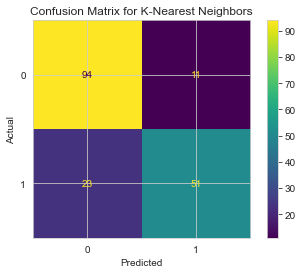

In [51]:
# Confusion matrix for KNN
plt.figure(figsize=(8, 6))
plot_confusion_matrix(knn, X_test_scaled, y_test, values_format='d')
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 13: Preparing Test Data for Submission

The same preprocessing steps applied to the training dataset are repeated on the test data for consistency.

In [52]:
# Load the dataset
test_data = pd.read_csv("test.csv")

In [53]:
# Display the first 5 rows
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
# Check dataset structure and data types
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [55]:
# View basic statistical summary
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [56]:
# Check for missing values
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [57]:
# Fill missing Age values with the median
test_data['Age']=test_data['Age'].fillna(test_data['Age'].median())

In [58]:
# Check missing Fare values
test_data[test_data['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [59]:
# Check skewness of Fare in both train and test datasets
train_data['Fare'].skew(), test_data['Fare'].skew()

(4.787316519674893, 3.6872133081121405)

In [60]:
# Fill missing Fare value based on median fare of passengers in the same Pclass and Embarked group
median_fare = test_data[(test_data['Pclass'] ==3) & (test_data['Embarked'] == 'S')]['Fare'].median()
test_data['Fare'] = test_data['Fare'].fillna(median_fare)

In [61]:
# Drop Cabin column due to too many missing values
test_data.drop('Cabin', axis=1, inplace=True)

In [62]:
# Check for duplicate rows
test_data_dup = test_data.duplicated().any()
test_data_dup

False

In [63]:
# Remove duplicate rows if any
test_data = test_data.drop_duplicates()

In [64]:
# Convert 'Sex' column to numeric: female = 0, male = 1
test_data['Sex']=test_data['Sex'].map({'female':0, 'male': 1})

In [65]:
# Print the first 5 rows of the dataset
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S


In [66]:
# Fill missing 'Embarked' values with the most common port (mode)
test_data['Embarked']=test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])

In [67]:
# Extract title from Name column (e.g., Mr, Mrs, Miss, etc.)
test_data['Title']=test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [68]:
# Print the unique titles in the dataset
test_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [69]:
# Map rare titles into grouped categories
title_mapping = {
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Master': 'Master',
    'Dr': 'Officer',
    'Rev': 'Officer',
    'Col': 'Officer',
    'Major': 'Officer',
    'Mlle': 'Miss',
    'Mme': 'Mrs',
    'Countess': 'Royalty',
    'Lady': 'Royalty',
    'Jonkheer': 'Royalty',
    'Don': 'Royalty',
    'Capt': 'Officer',
    'Sir': 'Royalty',
    'Ms': 'Miss'
}
test_data['Title'] = test_data['Title'].map(title_mapping)

In [70]:
# Fill the missing titles with 'Mr'
test_data['Title'] = test_data['Title'].fillna('Mr')

In [71]:
# Check the unique titles
test_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Officer'], dtype=object)

In [72]:
# Check for null values
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [73]:
# Drop irrelevant columns: 'Name' and 'Ticket'
test_data.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [74]:
# Encode the Title feature into numeric labels
le = LabelEncoder()
test_data['Title'] = le.fit_transform(test_data['Title'])

In [75]:
# Apply one-hot encoding on 'Embarked' column
test_data=pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)

In [76]:
# Convert the data type to Integer
test_data[['Embarked_Q', 'Embarked_S']] = test_data[['Embarked_Q', 'Embarked_S']].astype(int)

In [77]:
# Create FamilySize feature
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Create IsAlone feature: 1 if alone, 0 otherwise
test_data['IsAlone'] = 1 # default: alone
test_data.loc[test_data['FamilySize'] > 1, 'IsAlone'] = 0

In [78]:
# Drop redundant columns
test_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [79]:
# Prepare training and validation sets
X = train_data.drop(['Survived', 'PassengerId'], axis=1, errors='ignore')
y = train_data['Survived']

In [80]:
# Split the dataset into train and test set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 14: Generating Predictions and Submission File

The final predictions are made using the Logistic Regression model and exported to submission.csv for Kaggle submission.

In [81]:
# Train Logistic Regression model on the full training data
best_model = LogisticRegression(max_iter=1000)
best_model.fit(X, y)

LogisticRegression(max_iter=1000)

In [82]:
# Drop PassengerId before making predictions
test_features = test_data.drop(columns=['PassengerId'], errors='ignore')

# Generate predictions for test data
predictions = best_model.predict(test_features)

In [83]:
# Check the count of predicted survival classes
pd.Series(predictions).value_counts()

0    262
1    156
Name: count, dtype: int64

In [84]:
# Combine PassengerId with predictions for submission
result = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': predictions
})

In [85]:
# Save final predictions to CSV file
result.to_csv('submission.csv', index=False)
print("submission.csv file saved!")

submission.csv file saved!


In [86]:
# Display first few rows of the result
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
